In [50]:
import pymc3 as pm
import theano
from numpy import random, dot, array, inf
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [78]:
model = pm.Model()
with model:
    truth = pm.Uniform('truth',lower=0.,upper=300.)
    #gaus = pm.Uniform('gaus_syst1',lower=-3.,upper=3.)
    gaus = pm.Normal('gaus_syst1',mu=0.,sigma=1.0)
    pois = pm.Poisson('poisson', mu=truth*(1-0.2*gaus), observed=100)
    #pois = pm.Poisson('poisson', mu=truth*(1-0.2*gaus), observed=100) * pm.Normal('gaus_prior', mu=gaus, sigma=1., observed=0.)
    trace = pm.sample(10000, tune=1000, nuts_kwargs={'target_accept':0.95})
#    step = pm.Metropolis()
#    trace = pm.sample(10000, tune=1000, step=step)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [gaus_syst1, truth]
Sampling 4 chains: 100%|██████████| 44000/44000 [00:13<00:00, 3345.87draws/s]
The number of effective samples is smaller than 25% for some parameters.


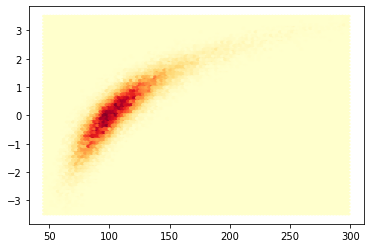

In [79]:
plt.hexbin(trace['truth'],trace['gaus_syst1'],cmap=plt.cm.YlOrRd)

In [80]:
trace.point(0)

{'truth_interval__': -0.6177110363527408,
 'gaus_syst1': -0.23240262801998499,
 'truth': 105.09066579228774}

NP mean = 0.21989254195083344
NP rms = 1.006304489666084


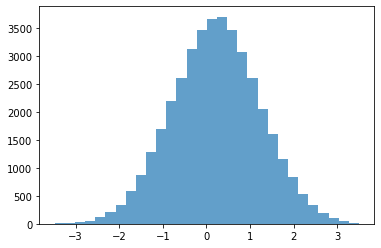

In [81]:
plt.hist(trace['gaus_syst1'], 30, label='posterior', alpha=0.7)
print('NP mean = {}'.format(np.mean(trace['gaus_syst1'])))
print('NP rms = {}'.format(np.std(trace['gaus_syst1'])))

truth mean = 111.06789177312817


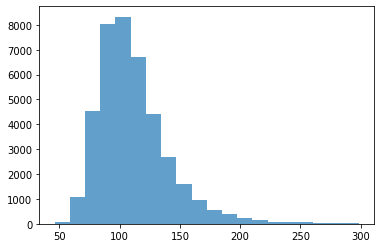

In [82]:
plt.hist(trace['truth'], 20, label='posterior', alpha=0.7)
print('truth mean = {}'.format(np.mean(trace['truth'])))